In [1]:
import sys 
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
import matplotlib
from multiprocessing import Pool
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
import Hyperparam_Testing.Testing_Notebooks.chirallag as cL


matplotlib.rcParams.update({'legend.fontsize': 26})
matplotlib.rcParams.update({'font.size': 26})
matplotlib.rcParams.update({'text.usetex': True})
#matplotlib.rcParams.update({'font.family': 'serif'})
matplotlib.rcParams.update({'text.latex.preamble': r'\usepackage{times}'})
matplotlib.rcParams.update({'text.latex.preamble': r'\usepackage{amsmath}'})
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

In [20]:
data = cf.noisy(0).data(10**7,cutoff =0.1)


Training data cut for potential values below 0.1
Remaining data fraction after cut  = 0.5802765
To retain 10000000 training points generating 7296071 more 
This produces 10036503 usefull points


In [21]:
from sklearn.model_selection import train_test_split as tts
train_x ,val_x ,train_y,val_y  = tts(data[:,:-1],data[:,-1],test_size = 0.1)


In [22]:
print(train_x.shape, train_y.shape, val_y.shape)

(9000000, 16) (9000000,) (1000000,)


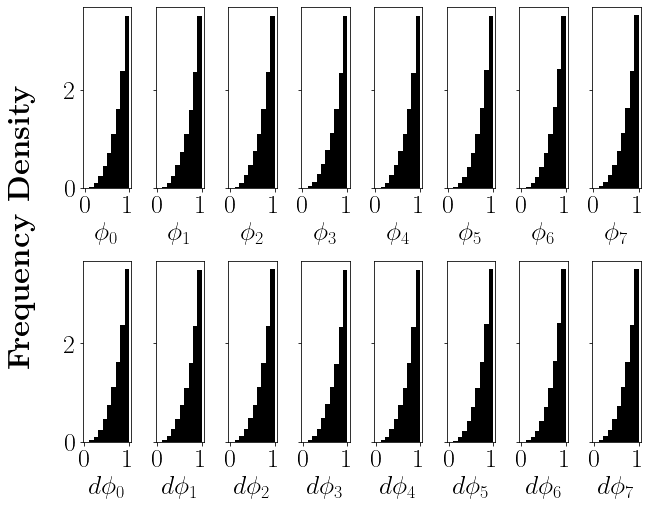

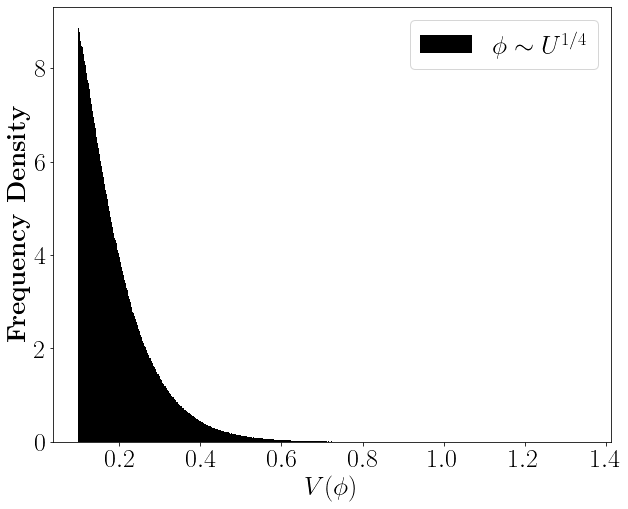

In [23]:
fig , ax = plt.subplots(2,8,sharey= True, figsize = (10,8))
plt.subplots_adjust(hspace= 0.4,wspace= 0.5)
for i in range(8):
    ax[0,i].hist(train_x[:,i], density = True, color = 'black') 
    ax[0,i].set_xticks([0,1])
    ax[1,i].set_xticks([0,1])
    ax[1,i].hist(train_x[:,8+i],density = True, color = 'black')
    ax[0,i].set_xlabel('$\phi_{{{}}}$'.format(i))
    ax[1,i].set_xlabel('$d\phi_{{{}}}$'.format(i))
fig.supylabel(r'\textbf{Frequency Density}')
fig_2 = plt.figure(figsize= (10,8))
plt.hist(train_y,density= True, bins = 1000, color = 'black',label=  '$\phi \sim U^{1/4}$')
#plt.hist(df_pions[:,-1],density= True, bins = 1000, color = 'blue',label=  '$\phi \sim U^{1/4}$' )
plt.xlabel('$V(\phi)$')
plt.ylabel(r'\textbf{Frequency Density}')
plt.legend()
#plt.tight_layout()
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/phi0.25.png',dpi = 400)
fig_2.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/pot.png',dpi = 400)

In [24]:
opt = keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.98)


In [25]:

model = models.Sequential()

model.add(layers.Input(train_x.shape[1]))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(300,activation= 'relu',kernel_initializer= 'random_normal'))
model.add(layers.Dense(1))
model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 300)               5100      
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_16 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 301       
Total params: 366,601
Trainable params: 366,601
Non-trainable params: 0
________________________________________________

In [26]:
epoch_num = 100
val_x.shape


(1000000, 16)

In [27]:

model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 32 , epochs = epoch_num)

Epoch 1/100
281250/281250 [==============================] - 1399s 5ms/step - loss: 3.8087 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 3.8087 - val_loss: 2.4311 - val_mean_absolute_error: 0.0046 - val_mean_absolute_percentage_error: 2.4311
Epoch 2/100
281250/281250 [==============================] - 717s 3ms/step - loss: 2.4112 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 2.4112 - val_loss: 1.9931 - val_mean_absolute_error: 0.0038 - val_mean_absolute_percentage_error: 1.9931
Epoch 3/100
281250/281250 [==============================] - 261s 929us/step - loss: 2.1021 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 2.1021 - val_loss: 2.0402 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 2.0402
Epoch 4/100
281250/281250 [==============================] - 496s 2ms/step - loss: 1.9379 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 1.9379 - val_loss: 1.7644 - val_mean_absolute_error: 0.0034 - val_

In [28]:
#history = model.history
model.save('./10{}datapoints.h5'.format(np.log10(train_y.shape[0]+val_y.shape[0])))
#model = tf.keras.models.load_model('./batchsize16.h5')

In [29]:
from keras import backend as K

get_relu_output = K.function([model.layers[0].input], [model.layers[5].output])
relu_output = get_relu_output([val_x])
mean_activ = np.mean(relu_output[0],axis=0)
plt.plot(mean_activ)

2022-03-22 22:39:40.942019: W tensorflow/core/common_runtime/bfc_allocator.cc:457] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.12GiB (rounded to 1200000000)requested by op MatMul
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-03-22 22:39:40.942067: I tensorflow/core/common_runtime/bfc_allocator.cc:1004] BFCAllocator dump for GPU_0_bfc
2022-03-22 22:39:40.942087: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (256): 	Total Chunks: 72, Chunks in use: 67. 18.0KiB allocated for chunks. 16.8KiB in use in bin. 588B client-requested in use in bin.
2022-03-22 22:39:40.942099: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-03-22 22:39:40.942112: I tensorflow/core/comm

ResourceExhaustedError: OOM when allocating tensor with shape[1000000,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:MatMul]

In [30]:
epoch_num = len(history.history['mean_absolute_error'])
epochs = np.arange(1,epoch_num+1)
mae = history.history['mean_absolute_error']
mape = np.array(history.history['mean_absolute_percentage_error'])
val_mae = np.array(history.history['val_mean_absolute_error'])
val_mape = np.array(history.history['val_mean_absolute_percentage_error'])
loss = history.history['loss']
val_loss = np.array(history.history['val_loss'])

NameError: name 'history' is not defined

In [ ]:
print(np.min(val_mape))

8.740983963012695


In [ ]:

val_mae_smooth = cf.exponetial_smoothing(val_mae,0.4)
val_loss_smooth = cf.exponetial_smoothing(val_loss,0.4)
val_mape_smooth = cf.exponetial_smoothing(val_mape,0.4)


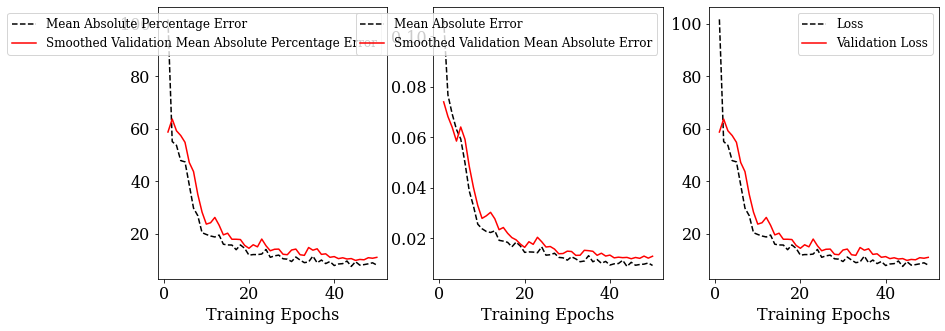

In [ ]:
matplotlib.rcParams.update({'legend.fontsize': 12})
fig_3, axs  = plt.subplots(1,3, figsize= (14,5))
axs[0].plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs[0].plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Percentage Error')
axs[0].set_xlabel('Training Epochs')
#axs[0].set_yscale('log')
#axs[0].set_ylim(0,10)
axs[0].legend()

axs[1].plot(epochs,mae, c = 'black',linestyle = '--',label = 'Mean Absolute Error')
axs[1].plot(epochs,val_mae_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Error')
axs[1].set_xlabel('Training Epochs')
#axs[1].set_yscale('log')
axs[1].legend()

cut = None
axs[2].plot(epochs[:cut],loss[:cut], label = 'Loss',c = 'black',linestyle = '--')
axs[2].plot(epochs[:cut],val_loss_smooth[:cut], label = 'Validation Loss',c = 'red')
axs[2].set_xlabel('Training Epochs')
#axs[2].set_yscale('log')
axs[2].legend()

In [ ]:
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))
print('')

Mean Potential Value =  -0.13889586045126806



In [ ]:
fig.savefig('../../Figures/Pions_uniform.png',dpi = 200)
fig_2.savefig('../../Figures/potential.png',dpi = 200)
fig_3.savefig('../../Figures/Inital_poc.png',dpi = 200)


In [ ]:
test_data = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data_2.csv',header = None))
test_data.shape

(100000, 17)

In [ ]:
#test = np.hstack((test_pi,test_dpi,test_V))
result = ((model.predict(test_data)))

ValueError: in user code:

    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 16 but received input with shape (32, 17)


In [ ]:
mean = []
chunk = 100
chunk_size  = len(result)//chunk
for i in range(chunk):
    mean.append(np.mean(abs(np.array((result+test_V)/test_V))[chunk_size*i:chunk_size*(i+1)]))
mean = np.array(mean)
std = np.std(mean)
mean = np.mean(mean)
print('mean is = ', mean, 'STD is = ', std)



NameError: name 'result' is not defined

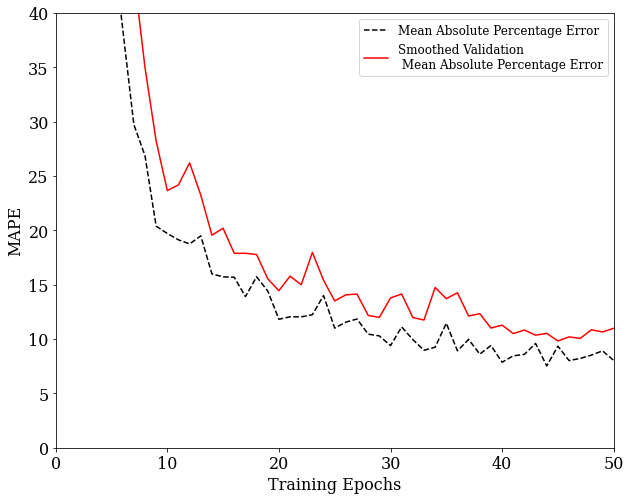

In [ ]:

fig_4, axs  = plt.subplots(1,1, figsize= (10,8))

axs.plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs.plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation \n Mean Absolute Percentage Error')


axs.set_xlabel('Training Epochs', )
axs.set_ylabel('MAPE')
#axs.set_yscale('log')
axs.set_ylim(0,40)
axs.set_xlim(0,50)
axs.legend()



In [ ]:
fig_4.savefig('../../Figures/flat_yet_decreasing.png',dpi = 200)